# A First Look at a Neural Network

This notebook provides an introductory overview of neural networks, covering fundamental concepts and basic implementation.

## What is a Neural Network?

A neural network is a computational model inspired by the structure and function of biological neural networks. It is designed to recognize patterns and make decisions by processing data through layers of interconnected nodes, or "neurons."

*   **Inspired by the Brain**: Neural networks mimic the way neurons in the human brain process information.
*   **Pattern Recognition**: They are particularly good at identifying complex patterns in data that are difficult for traditional algorithms to find.
*   **Learning**: Neural networks learn from data by adjusting the connections (weights) between neurons.

## The Basic Structure

A simple neural network typically consists of three types of layers:

*   **Input Layer**: Receives the initial data. Each neuron in this layer represents a feature of the input data.
*   **Hidden Layers**: Intermediate layers where the network performs computations and extracts features from the input data. There can be one or more hidden layers.
*   **Output Layer**: Produces the final result or prediction. The number of neurons in this layer depends on the task (e.g., one for binary classification, multiple for multi-class classification or regression).

In [ ]:
# Let's visualize a simple neural network structure conceptually
# This is a conceptual diagram, not executable code for creating a network

# Imagine input layer with 2 neurons (e.g., two features)
input_layer = ['Feature 1', 'Feature 2']

# Imagine a hidden layer with 3 neurons
hidden_layer = ['Neuron 1', 'Neuron 2', 'Neuron 3']

# Imagine an output layer with 1 neuron (e.g., for binary classification)
output_layer = ['Output']

print("Conceptual structure of a simple neural network:")
print(f"Input Layer: {input_layer}")
print(f"Hidden Layer: {hidden_layer}")
print(f"Output Layer: {output_layer}")

# Connections exist between neurons in adjacent layers
# These connections have weights that are learned during training.

Conceptual structure of a simple neural network:
Input Layer: ['Feature 1', 'Feature 2']
Hidden Layer: ['Neuron 1', 'Neuron 2', 'Neuron 3']
Output Layer: ['Output']


## How it Works: The Neuron

Each neuron in a neural network performs a simple computation:

1. **Weighted Sum**: It receives inputs from the previous layer, multiplies each input by a corresponding weight, and sums these weighted inputs.
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$
where:
   * $z$ is the weighted sum.
   * $w_i$ are the weights.
   * $x_i$ are the inputs.
   * $b$ is the bias term.
2. **Activation Function**: The weighted sum is then passed through an activation function, which introduces non-linearity into the network. This is crucial for the network to learn complex patterns. Common activation functions include:
   * **Sigmoid**: $$
f(x) = \frac{1}{1 + e^{-x}}
$$
   * **ReLU (Rectified Linear Unit)**: $$
f(x) = \max(0, x)
$$
   * **Tanh (Hyperbolic Tangent)**: $$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
   
   The output of the activation function becomes the input to the neurons in the next layer.
$$
a = f(z)
$$
where:
   * $a$ is the output of the neuron.
   * $f$ is the activation function.


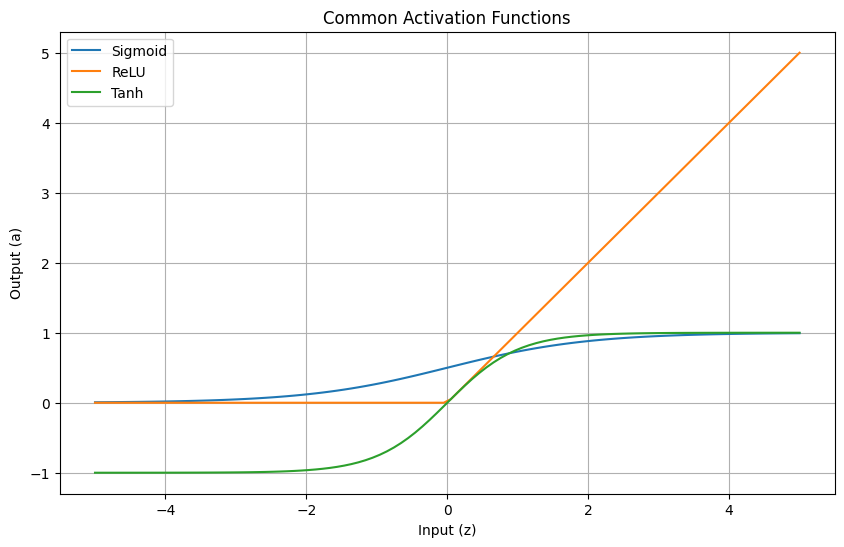

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's define some common activation functions

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def tanh(x):
  return np.tanh(x)

# Generate some data to plot the activation functions
x_values = np.linspace(-5, 5, 100)

# Plot the activation functions
plt.figure(figsize=(10, 6))

plt.plot(x_values, sigmoid(x_values), label='Sigmoid')
plt.plot(x_values, relu(x_values), label='ReLU')
plt.plot(x_values, tanh(x_values), label='Tanh')

plt.title('Common Activation Functions')
plt.xlabel('Input (z)')
plt.ylabel('Output (a)')
plt.legend()
plt.grid(True)
plt.show()

## Learning Process: Training the Network

Neural networks learn by adjusting their weights and biases based on the difference between their predictions and the actual values (the error). This learning process is called training and typically involves the following steps:

1. **Forward Pass**: Input data is fed through the network, layer by layer, to produce an output prediction.
2. **Calculate Loss**: A loss function measures the discrepancy between the network's prediction and the true target value. Common loss functions include:
   * **Mean Squared Error (MSE)** for regression: $$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
   * **Cross-Entropy Loss** for classification: $$
H(p, q) = -\sum_x p(x) \log q(x)
$$
3. **Backward Pass (Backpropagation)**: The error is propagated backward through the network, and the gradients of the loss function with respect to the weights and biases are calculated.
4. **Weight Update**: An optimization algorithm (e.g., Gradient Descent) uses these gradients to adjust the weights and biases in a way that reduces the loss.
$$
w_{new} = w_{old} - \alpha \nabla J(w)
$$
where:
   * $w$ represents the weights.
   * $\alpha$ is the learning rate (controls the step size of the update).
   * $\nabla J(w)$ is the gradient of the loss function $J$ with respect to the weights.

This iterative process of forward pass, loss calculation, backward pass, and weight update is repeated for many iterations (epochs) until the network's performance on the training data is satisfactory.


In [ ]:
# Conceptual example of a loss function (Mean Squared Error)

def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

# Example usage
y_true = np.array([1, 2, 3, 4])
y_pred = np.array([1.1, 1.9, 3.2, 3.8])

loss = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {loss}")

Mean Squared Error: 0.025000000000000043


## Simple Implementation Example (using Keras/TensorFlow)

Let's create a very simple neural network to demonstrate the basic structure and training process using a popular deep learning library like Keras (which is part of TensorFlow).

**Note**: This requires TensorFlow to be installed. You can install it using `!pip install tensorflow`.

In [ ]:
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    print("TensorFlow imported successfully!")
except ImportError:
    print("TensorFlow not installed. Please run '!pip install tensorflow' to install it.")

TensorFlow imported successfully!


Now, let's build and train a simple model for a basic regression task. We'll generate some synthetic data for this example.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for input 5.0: 0.40


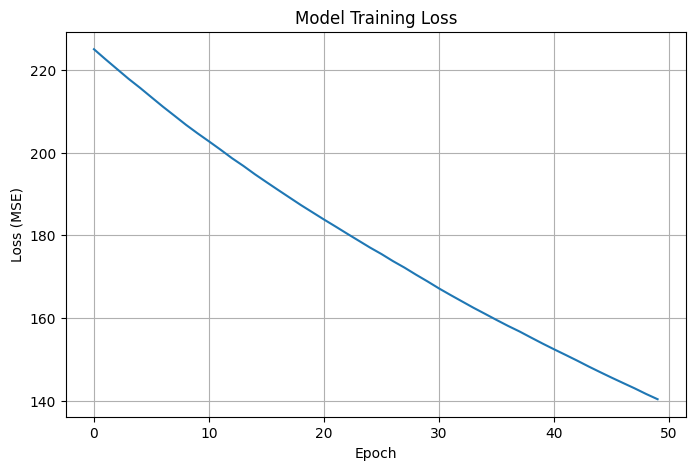

In [ ]:
# Generate some synthetic data
np.random.seed(0)
X_train = np.random.rand(100, 1) * 10
y_train = 2 * X_train + 1 + np.random.randn(100, 1) # y = 2x + 1 + noise

# Build a simple sequential model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)), # Hidden layer with 10 neurons and ReLU
    layers.Dense(1) # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse') # Adam optimizer, Mean Squared Error loss

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=0) # Train for 50 epochs

# Make a prediction
X_test = np.array([[5.0]])
y_pred = model.predict(X_test)

print(f"Prediction for input 5.0: {y_pred[0][0]:.2f}")

# Plot the training loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

## Conclusion

This notebook provided a basic introduction to neural networks, covering their structure, how neurons work, and the fundamental training process. This is just the beginning; neural networks are a vast and rapidly evolving field with many different architectures and applications.